# Import Libraries

In [1]:
import utility_func as util

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
curr_dir = (util.os.getcwd()).replace('\\', '/')
data_path = (util.os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [4]:
str_sed_data = util.pd.read_csv(data_path + '/Kodangal dataset/proc_elem_Kodangal_gcM.csv')

In [5]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,hf,ta,w,u,toposheet,in_,f,te,tl,hg
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,44.750,10.930,3.312,0.560,6.20,...,5.746369,0.862203,0.991997,1.811020,56G04,0.052741,322.0,0.101815,0.293517,17.0
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,45.129,10.930,3.748,0.580,6.20,...,7.857656,0.958655,0.943758,2.203597,56G04,0.048799,336.0,0.072979,0.300787,8.0
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,58.283,12.534,7.768,1.321,2.91,...,8.728652,1.428838,1.682294,2.711943,56G04,0.126064,205.0,0.121959,0.481961,12.0
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,61.180,11.670,8.340,1.420,2.43,...,9.365000,1.542800,1.803219,2.982200,56G04,0.084033,230.0,0.071592,0.427797,10.0
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,60.300,11.470,8.270,1.430,1.99,...,10.693400,1.467300,1.451395,3.249200,56G04,0.083470,300.0,0.067475,0.447018,7.0


# Regression

# EDA

In [6]:
str_elem = util.elem_list(str_sed_data)

In [7]:
len(str_elem)

61

In [8]:
elem_df = str_sed_data[str_elem]
elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,lu,hf,ta,w,u,in_,f,te,tl,hg
0,44.750,10.930,3.312,0.560,6.20,1.573,0.073,0.152,1.258,0.129,...,0.335326,5.746369,0.862203,0.991997,1.811020,0.052741,322.0,0.101815,0.293517,17.0
1,45.129,10.930,3.748,0.580,6.20,1.480,0.109,0.167,1.207,0.080,...,0.391008,7.857656,0.958655,0.943758,2.203597,0.048799,336.0,0.072979,0.300787,8.0
2,58.283,12.534,7.768,1.321,2.91,1.912,0.192,0.050,0.800,0.061,...,0.508111,8.728652,1.428838,1.682294,2.711943,0.126064,205.0,0.121959,0.481961,12.0
3,61.180,11.670,8.340,1.420,2.43,1.710,0.180,0.250,0.660,0.080,...,0.531900,9.365000,1.542800,1.803219,2.982200,0.084033,230.0,0.071592,0.427797,10.0
4,60.300,11.470,8.270,1.430,1.99,1.610,0.170,0.230,0.580,0.061,...,0.524000,10.693400,1.467300,1.451395,3.249200,0.083470,300.0,0.067475,0.447018,7.0


### Histogram plots

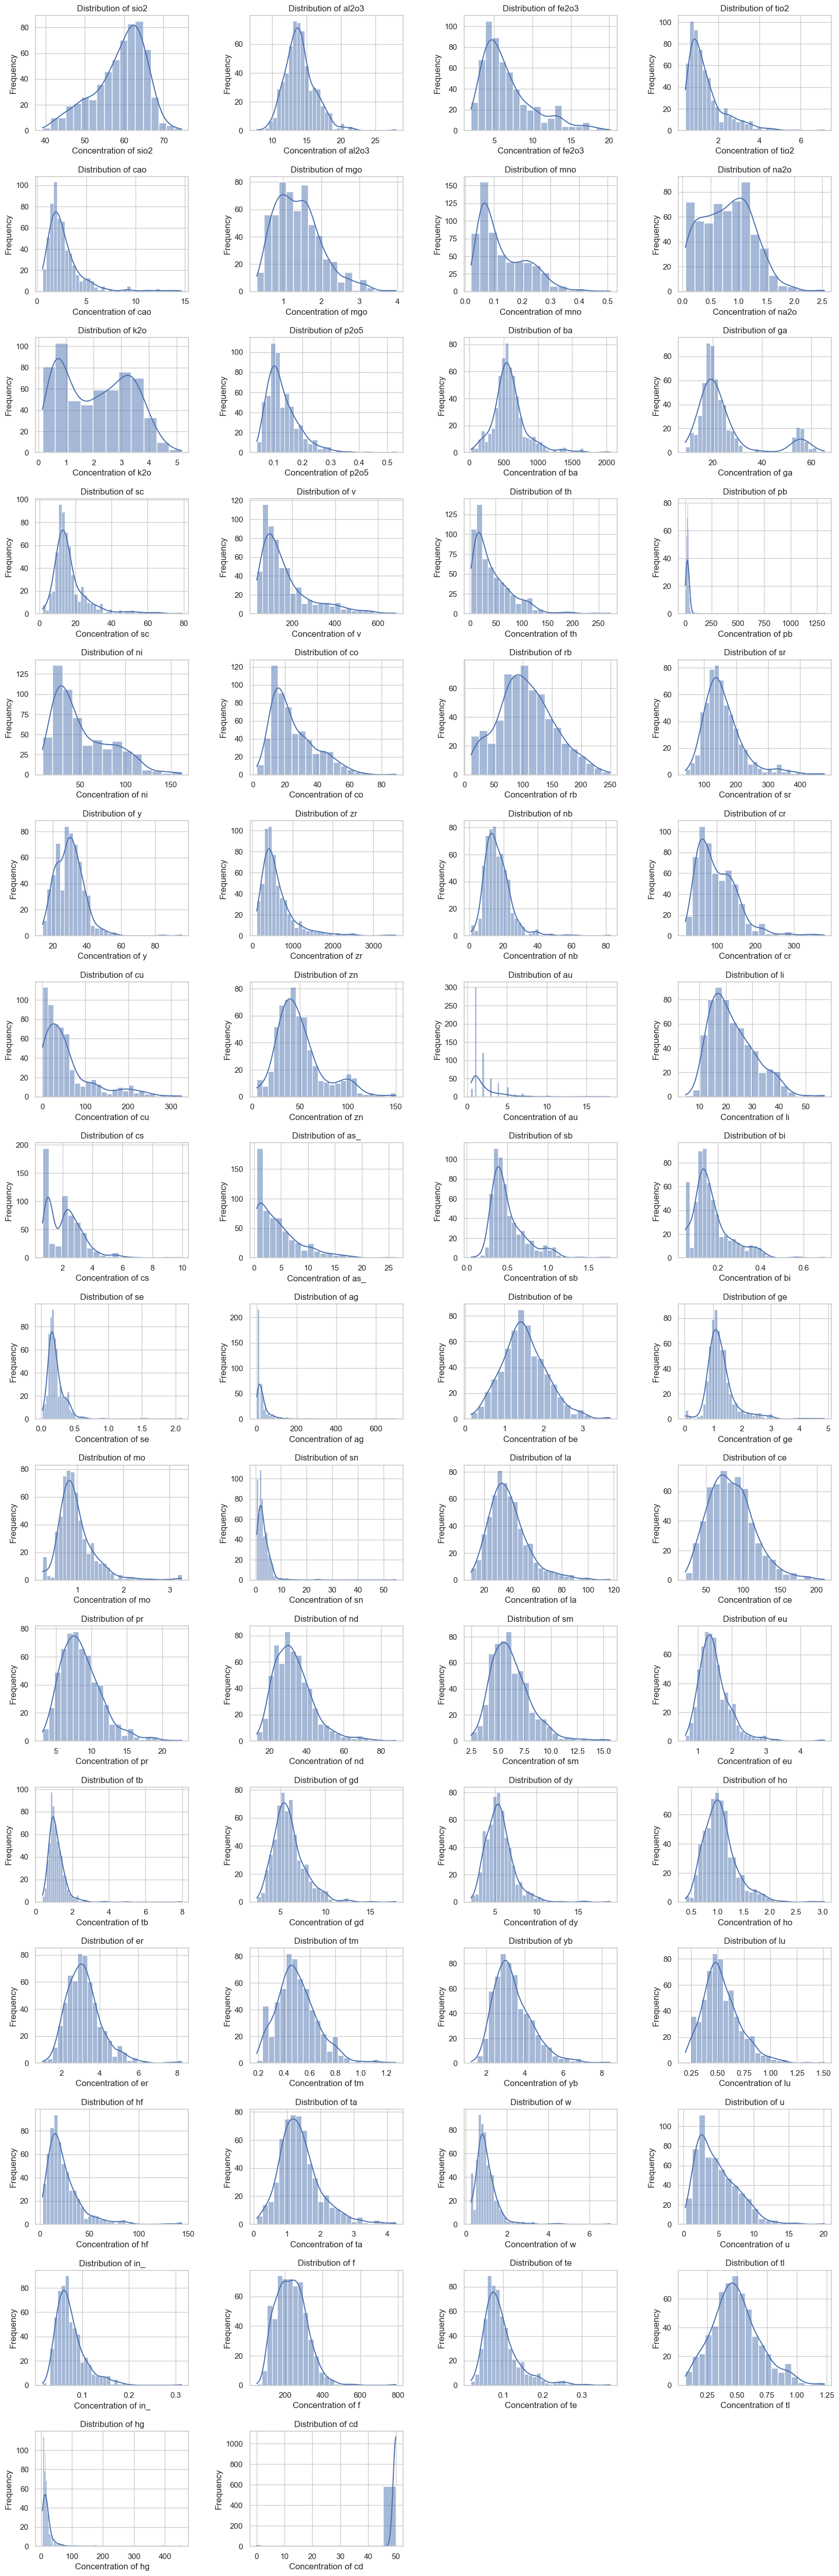

In [92]:
num_elem = len(str_elem)
num_cols = 4
num_rows = (num_elem + num_cols - 1)//num_cols 

sns.set(style='whitegrid')

fig, axes = plt.subplots(num_rows, 
                         num_cols, 
                         figsize=(num_cols*5, num_rows*4))

fig.subplots_adjust(hspace=0.4, 
                    wspace=0.4)

for i, elem in enumerate(str_elem):

    ax = axes[i // num_cols, i % num_cols]  # Determine the position in the grid
    sns.histplot(elem_df[elem], 
                 kde=True, 
                 ax=ax)
    ax.set_title(f'Distribution of {elem}')
    ax.set_xlabel(f'Concentration of {elem}')
    ax.set_ylabel('Frequency')

# If there are any empty subplots in the grid, hide them
for j in range(i + 1, num_rows * num_cols):
    axes[j // num_cols, j % num_cols].axis('off')

plt.show()

## Boxplots

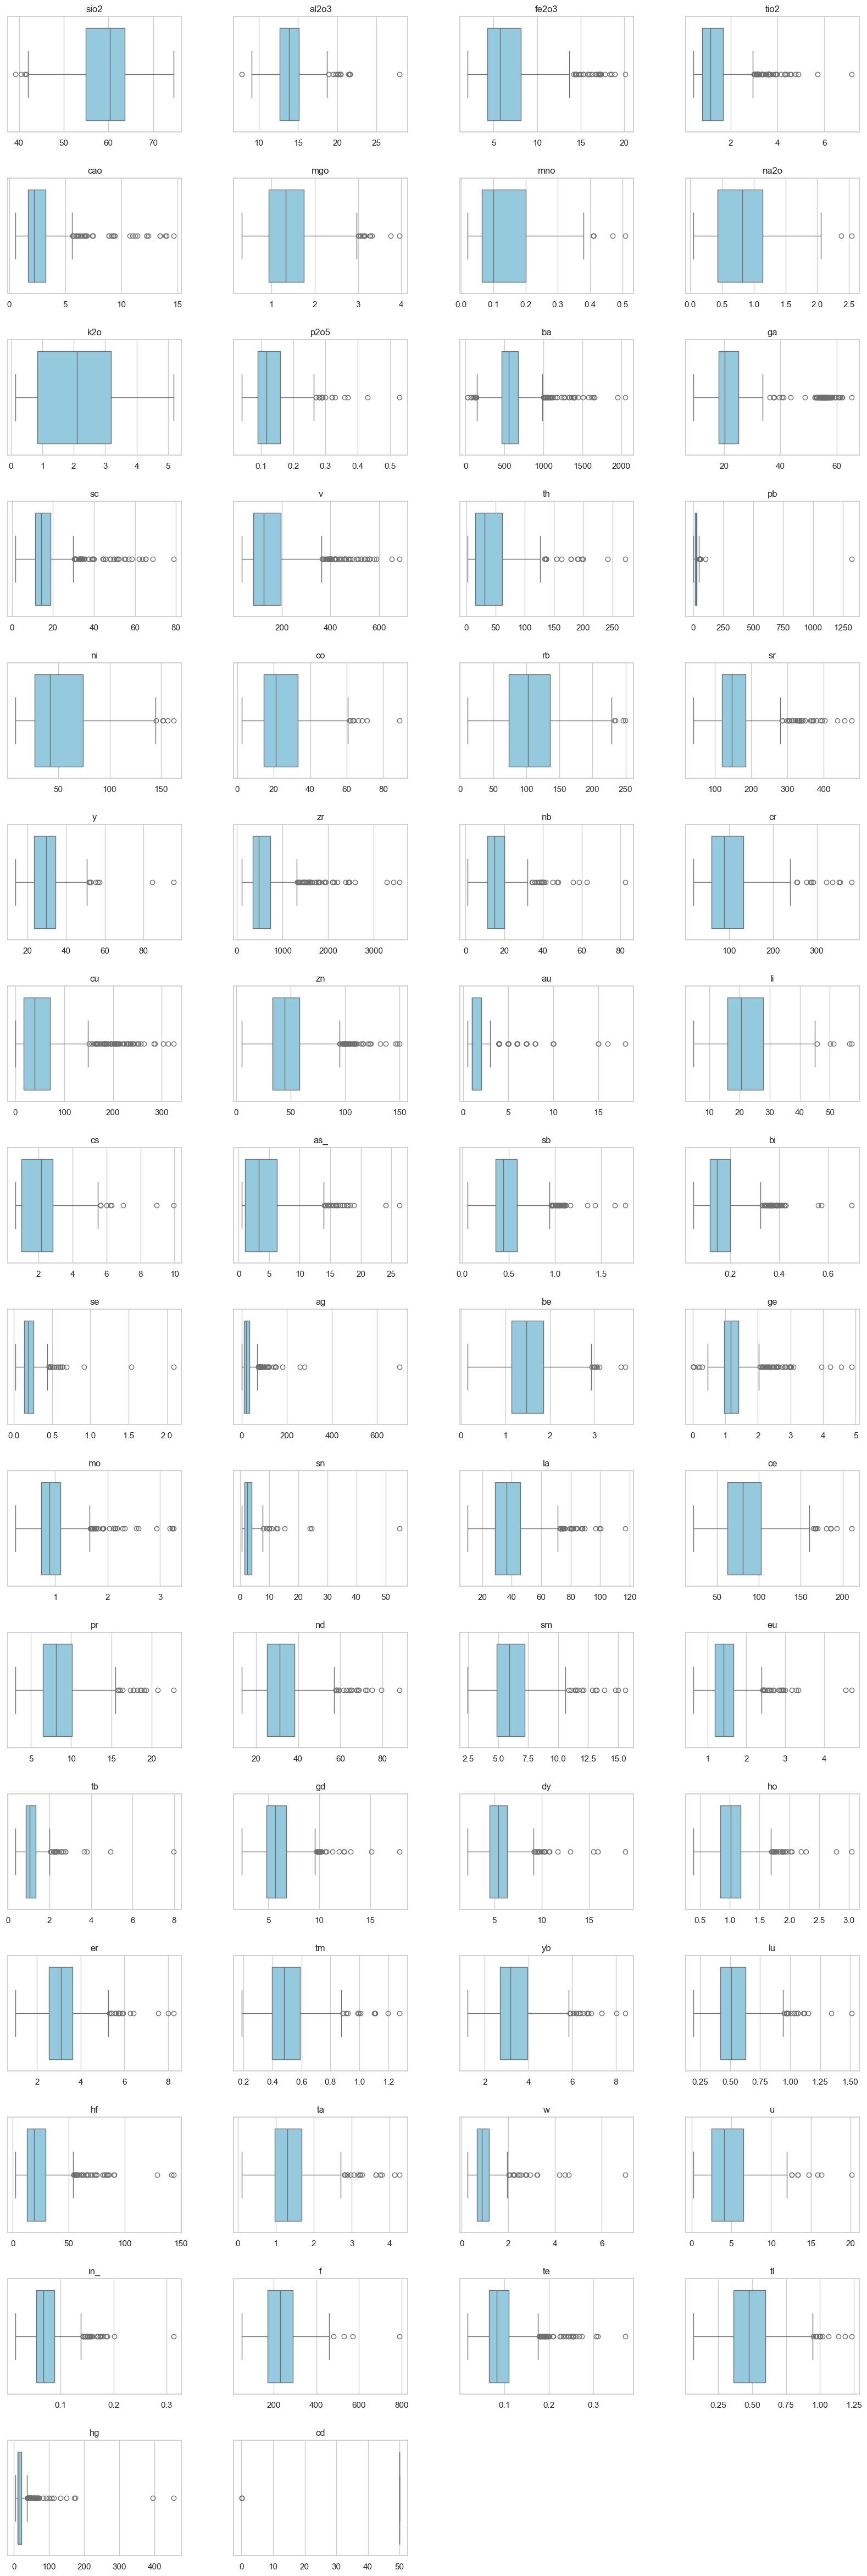

In [93]:
n_elem = len(str_elem)

fig, axes = plt.subplots(nrows=(n_elem+4-1)//4, 
                         ncols=4, 
                         figsize=(20, 4 * (n_elem//4)))

fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

# Plot each element in its subplot
for i, (elem, ax) in enumerate(zip(str_elem, axes.flatten())):
    sns.boxplot(x=elem_df[str_elem][elem], 
                ax=ax, 
                color="skyblue")
    ax.set_title(elem)
    ax.set_xlabel('')  # Clear the x-labels if they clutter the plot

#If there are any leftover axes, turn them off
for j in range(i + 1, ((n_elem+4-1)//4) * 4):
    axes.flatten()[j].set_visible(False)

plt.show()

## Drop elements based on certain condition

- Elements having concentration values less than 1

In [9]:
drop_elem = ['mno', 'p2o5', 'sb', 'bi', 'se', 'ho', 'tm', 'lu', 'in_', 'te', 'tl']

In [10]:
elem_df.drop(drop_elem, axis=1, inplace=True)

# Feature Selection

## Split into train, validation and test data

In [11]:
train_df = elem_df.copy()
target = elem_df['cu']
train_df.drop(['cu'], axis=1, inplace=True)

In [12]:
X_train, X_test, y_train, y_test = util.train_test_split(train_df, 
                                                         target, 
                                                         test_size=0.1, 
                                                         random_state=42,
                                                         shuffle=True)

In [13]:
X_train, X_val, y_train, y_val = util.train_test_split(X_train, 
                                                       y_train, 
                                                       test_size=0.1, 
                                                       random_state=42,
                                                       shuffle=True)

## Normalize

In [14]:
rs = util.RobustScaler()

norm_data = rs.fit_transform(X_train)

X_train_norm = util.pd.DataFrame(norm_data, 
                                 index=X_train.index, 
                                 columns=X_train.columns)

## Estimator: Random Forest

In [15]:
# rf = RandomForestRegressor(max_depth= 30, max_features='log2', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100, n_jobs=-1)
# rf = RandomForestRegressor(max_depth= 10, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, n_jobs=-1)
rf = util.RandomForestRegressor()
rfecv_rf = util.rfecv(rf, X_train_norm, y_train, 1, 5)

In [16]:
print('Optimal number of features: {}'.format(rfecv_rf.n_features_))

Optimal number of features: 25


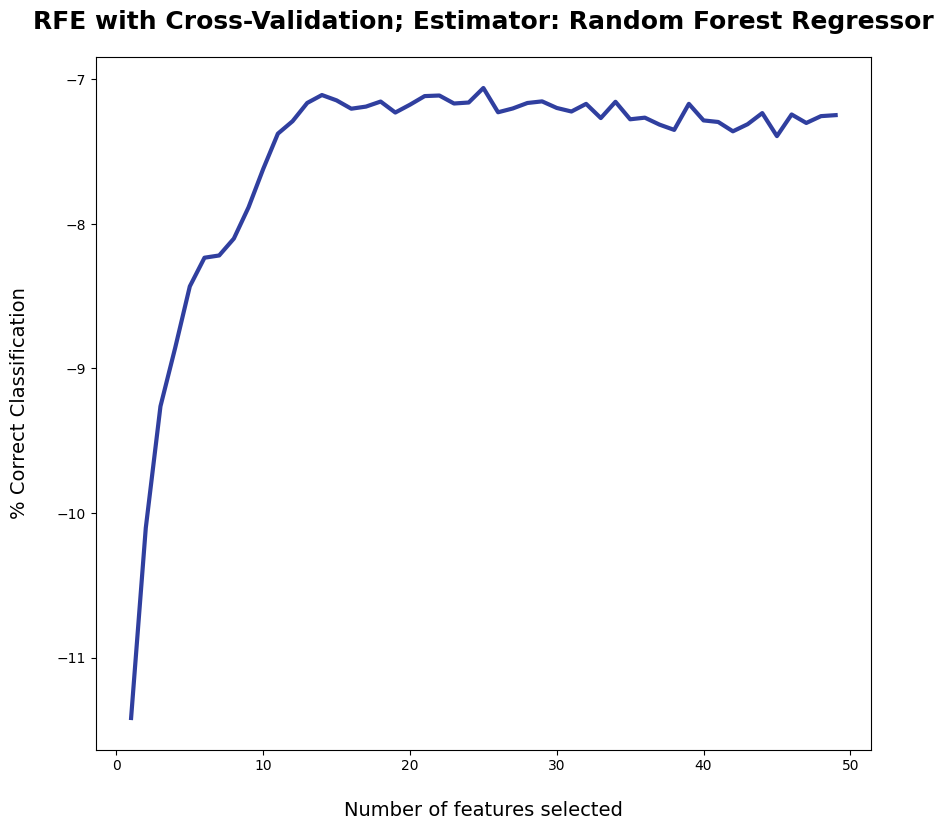

In [17]:
util.plot_pcc(rfecv_rf, 'RFE with Cross-Validation; Estimator: Random Forest Regressor')

In [18]:
X_rf = X_train_norm.drop(X_train_norm.columns[util.np.where(rfecv_rf.support_ == False)[0]], axis=1)

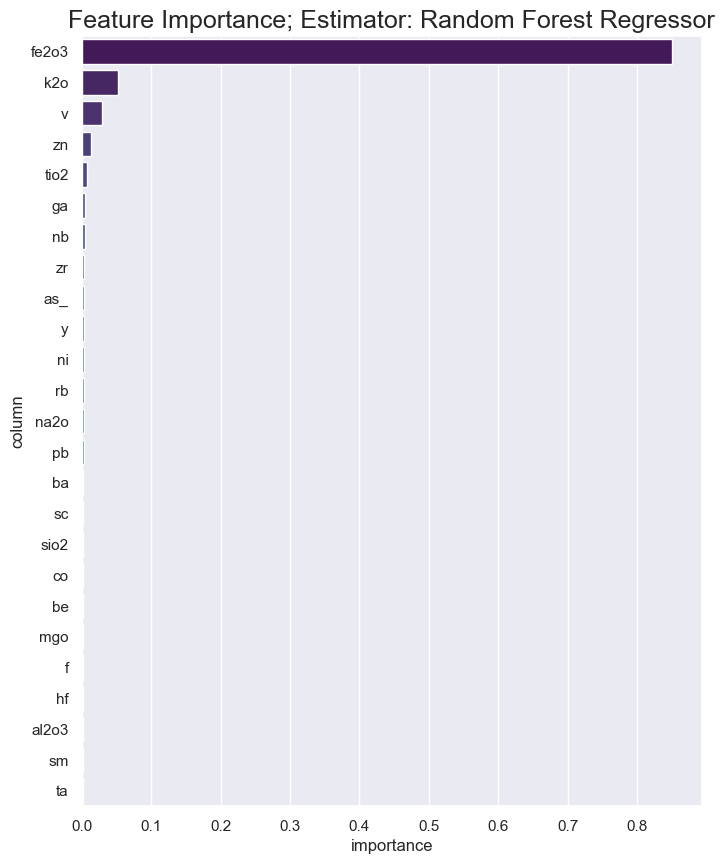

In [19]:
util.feature_importance(rfecv_rf, X_rf, 'Feature Importance; Estimator: Random Forest Regressor')

In [20]:
# X_rf = X_rf[['sio2', 'zn', 'co', 'k2o', 'rb', 'mno', 'ni']]
# X_rf = X_rf[['fe2o3', 'k2o', 'v', 'zn', 'tio2', 'sio2', 'co', 'ni', 'rb', 'cr', 'th', 'zr']]

## Estimator: Gradient Boosting

In [40]:
gbr = util.GradientBoostingRegressor()
rfecv_bgr = util.rfecv(gbr, X_train_norm, y_train, 1, 5)

In [41]:
print('Optimal number of features: {}'.format(rfecv_bgr.n_features_))

Optimal number of features: 42


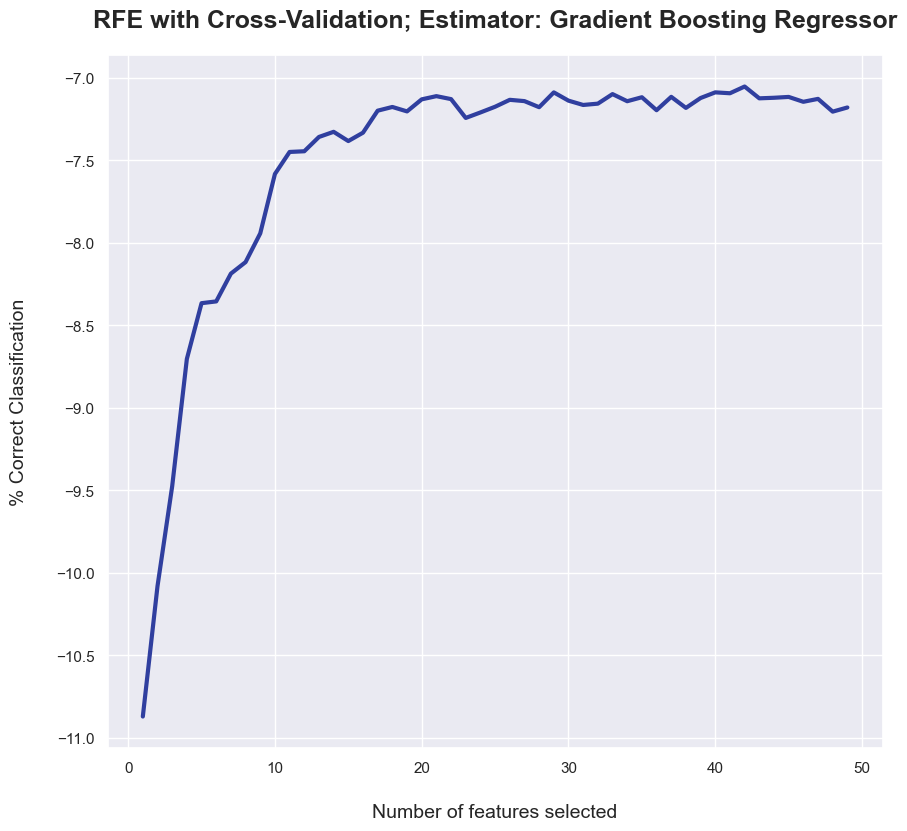

In [42]:
util.plot_pcc(rfecv_bgr, 'RFE with Cross-Validation; Estimator: Gradient Boosting Regressor')

In [43]:
X_gbr = X_train_norm.drop(X_train_norm.columns[util.np.where(rfecv_bgr.support_ == False)[0]], axis=1)

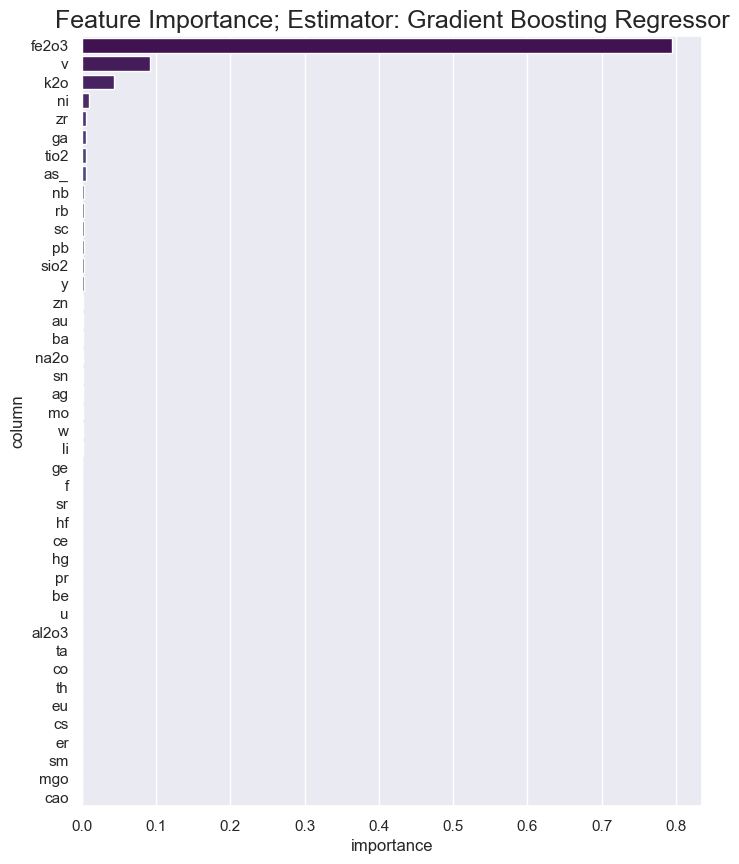

In [44]:
util.feature_importance(rfecv_bgr, X_gbr, 'Feature Importance; Estimator: Gradient Boosting Regressor')

In [101]:
X_gbr = X_gbr[['v', 'fe2o3', 'rb', 'k2o', 'cr', 'zr']]

# Model Training

## Random Forest

- Estimator: Random Forest

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [1, 2, 3, 4, 'sqrt'],   # Number of features to consider at every split
    'max_depth': [10, 20, 30],    # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
}

rf = util.RandomForestRegressor()

grid_search_rfr_rf = util.GridSearchCV(rf, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_rfr_rf.fit(X_rf, y_train)

# Get the best hyperparameters
best_params = grid_search_rfr_rf.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Run the models on validation data

In [21]:
y_pred_val = util.pred_val(X_val, list(X_rf.columns), rs, grid_search_rfr_rf)

In [22]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 4.72
Mean Absolute Error: 8.91
R-squared Error: 0.93


### Run the model on test data

In [24]:
y_pred = util.pred_val(X_test, list(X_rf.columns), rs, grid_search_rfr_rf)

In [25]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 5.2
Mean Absolute Error: 8.13
R-squared Error: 0.94


### Learning Curve

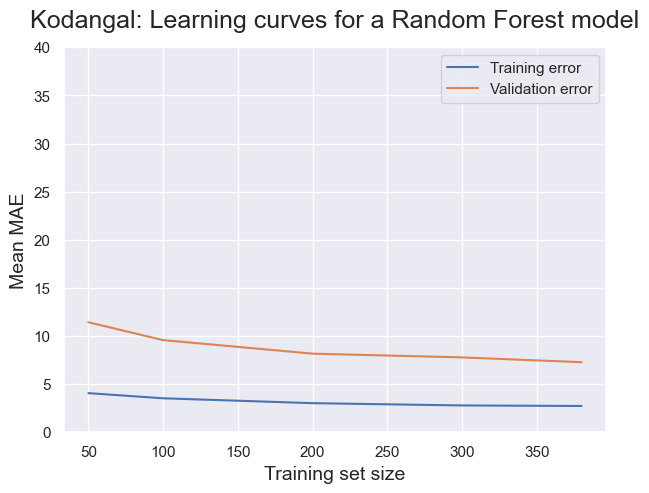

In [28]:
util.plot_learing_curve(util.RandomForestRegressor(max_depth=30, 
                                                   max_features='sqrt', 
                                                   min_samples_leaf=1, 
                                                   min_samples_split=2, 
                                                   n_estimators=200), 
                        X_rf, y_train, 5, 'Random Forest', 'Kodangal')

In [29]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

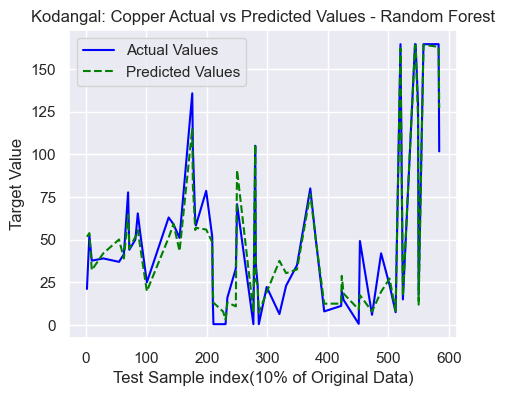

In [30]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Kodangal: Copper Actual vs Predicted Values - Random Forest')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

- Estimator: Gradient Boosting

In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [1, 2, 3, 4, 'sqrt'],   # Number of features to consider at every split
    'max_depth': [10, 20, 30],    # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
}

rf = util.RandomForestRegressor()

grid_search_rfr_gb = util.GridSearchCV(rf, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_rfr_gb.fit(X_gbr, y_train)

# Get the best hyperparameters
best_params = grid_search_rfr_gb.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Run the models on validation data

In [47]:
y_pred_val = util.pred_val(X_val, list(X_gbr.columns), rs, grid_search_rfr_gb)

In [49]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 5.08
Mean Absolute Error: 9.2
R-squared Error: 0.93


### Run the model on test data

In [50]:
y_pred = util.pred_val(X_test, list(X_gbr.columns), rs, grid_search_rfr_gb)

In [51]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 6.06
Mean Absolute Error: 8.6
R-squared Error: 0.93


## XGBoost

- Estimator: Random Forest

In [31]:
param_grid = {
    'n_estimators': [200, 300],    
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5, 7],          
    'colsample_bytree': [0.5, 0.7, 1.0], 
    'subsample': [0.5, 0.7, 1.0],        
    'gamma': [0.1, 0.2],             
    'reg_alpha': [0.5, 1],       
    'reg_lambda': [0.5, 1],           
    'objective': ['reg:squarederror']
}

xgb = util.xgboost.XGBRegressor()

grid_search_xgb_rf = util.GridSearchCV(xgb, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_xgb_rf.fit(X_rf, y_train)

# Get the best hyperparameters
best_params = grid_search_xgb_rf.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'objective': 'reg:squarederror', 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.7}


### Run the model on validation data

In [32]:
y_pred_val = util.pred_val(X_val, list(X_rf.columns), rs, grid_search_xgb_rf)

In [34]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 4.86
Mean Absolute Error: 8.44
R-squared Error: 0.94


### Run the model on test data

In [35]:
y_pred = util.pred_val(X_test, list(X_rf.columns), rs, grid_search_xgb_rf)

In [36]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 3.88
Mean Absolute Error: 7.76
R-squared Error: 0.94


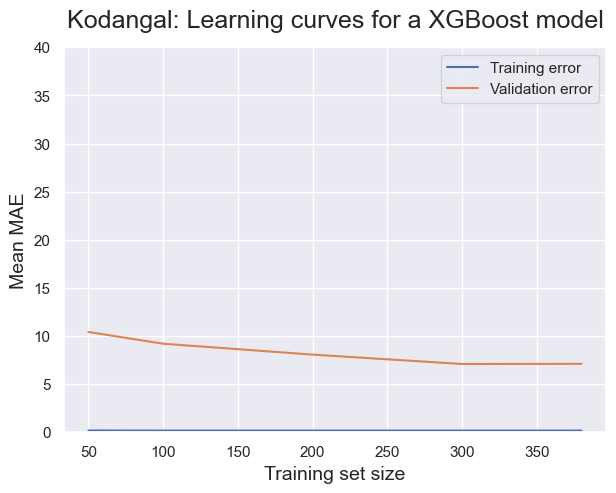

In [37]:
util.plot_learing_curve(util.xgboost.XGBRegressor(colsample_bytree=1, 
                                                  gamma=0.2, 
                                                  learning_rate=0.1, 
                                                  max_depth=5, 
                                                  n_estimators=300, 
                                                  objective='reg:squarederror', 
                                                  reg_alpha=0.5, 
                                                  reg_lambda=1, 
                                                  subsample=0.7), 
                        X_rf, y_train, 5, 'XGBoost', 'Kodangal')

In [38]:
plot_vals = util.pd.DataFrame({
    'Identifier': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

plot_vals = plot_vals.sort_values(by='Identifier')

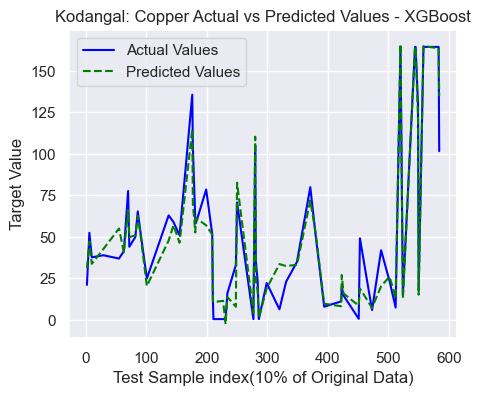

In [39]:
util.plt.figure(figsize=(5, 4))
util.plt.plot(plot_vals['Actual'], label='Actual Values', color='blue')
util.plt.plot(plot_vals['Predicted'], label='Predicted Values', color='green', linestyle='--')
util.plt.title('Kodangal: Copper Actual vs Predicted Values - XGBoost')
util.plt.xlabel('Test Sample index(10% of Original Data)')
util.plt.ylabel('Target Value')
util.plt.legend()
util.plt.grid(True)
util.plt.show()

- Estimator: Gradient Boosting

In [52]:
param_grid = {
    'n_estimators': [200, 300],    
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5, 7],          
    'colsample_bytree': [0.5, 0.7, 1.0], 
    'subsample': [0.5, 0.7, 1.0],        
    'gamma': [0.1, 0.2],             
    'reg_alpha': [0.5, 1],       
    'reg_lambda': [0.5, 1],           
    'objective': ['reg:squarederror']
}

xgb = util.xgboost.XGBRegressor()

grid_search_xgb_gb = util.GridSearchCV(xgb, 
                                       param_grid, 
                                       cv=5, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=5, 
                                       n_jobs=-1)

grid_search_xgb_gb.fit(X_gbr, y_train)

# Get the best hyperparameters
best_params = grid_search_xgb_gb.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'objective': 'reg:squarederror', 'reg_alpha': 1, 'reg_lambda': 0.5, 'subsample': 0.7}


### Run the model on validation data

In [53]:
y_pred_val = util.pred_val(X_val, list(X_gbr.columns), rs, grid_search_xgb_gb)

In [54]:
util.eval_model(y_val, y_pred_val, 'Validation set')

Validation set
Median Absolute Error: 5.09
Mean Absolute Error: 9.01
R-squared Error: 0.94


### Run the model on test data

In [55]:
y_pred = util.pred_val(X_test, list(X_gbr.columns), rs, grid_search_xgb_gb)

In [56]:
util.eval_model(y_test, y_pred, 'Test set')

Test set
Median Absolute Error: 3.99
Mean Absolute Error: 7.67
R-squared Error: 0.93


# Saving the models

In [58]:
model_path = (util.os.path.join(curr_dir, 'Models/Kodangal/')).replace('\\', '/')

In [59]:
## Robust Scaler model
with open(model_path + 'rs_norm.pkl', 'wb') as file:
    util.pkl.dump(rs, file)

# Random Forest with RF estimator
with open(model_path + 'RFR_RF.pkl', 'wb') as file:
    util.pkl.dump(grid_search_rfr_rf, file)

# # Random Forest with GB estimator
# with open(model_path + 'RFR_GB.pkl', 'wb') as file:
#     pkl.dump(grid_search_rfr_gb, file)

# XGBoost with RF estimator
with open(model_path + 'XGB_RF.pkl', 'wb') as file:
    util.pkl.dump(grid_search_xgb_rf, file)

# # XGBoost with GB estimator
# with open(model_path + 'XGB_GB.pkl', 'wb') as file:
#     pkl.dump(grid_search_xgb_rf, file)

In [71]:
X_rf_df = util.pd.DataFrame(X_rf.columns, columns=['Elements'])
with util.pd.ExcelWriter(data_path + '/Kodangal dataset/Kodangal_element_names1.xlsx', engine='openpyxl', mode='a') as writer:
    X_rf_df.to_excel(writer, sheet_name='Model Features', index=False)

# Test the models

In [78]:
y_test

107    1.0
591    0.0
81     1.0
323    4.0
904    4.0
      ... 
506    1.0
319    1.0
260    1.0
958    5.0
722    0.0
Name: au, Length: 118, dtype: float64

In [116]:
new_obsrv = elem_df[elem_df.index == 81].drop('au', axis=1)
new_obsrv

,sio2,al2o3,fe2o3,tio2,cao,mgo,na2o,k2o,ba,ga,...,er,tm,yb,lu,hf,ta,w,u,f,hg
81,60.19,13.11,7.08,1.45,3.29,1.69,0.25,0.77,521.0,18.0,...,3.311743,0.538243,3.366489,0.548267,16.483437,1.273944,1.377158,2.205044,124.0,10.0


In [117]:
y_pred = pred_val(new_obsrv, list(X_gbr.columns), sc, grid_search_rfr_gb)
y_pred

array([1.59629048])

# Classification

## Load Clean Data

In [145]:
str_sed_data = pd.read_csv(data_path + '/Kodangal dataset/clean_Kodangal_gcM.csv')

In [146]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,toposheet,sio2,al2o3,fe2o3,tio2,...,hf,ta,w,u,in_,f,te,tl,hg,cd
0,274643,276298,56G04/014/SS/18-19,77.25,17.00904,56G04,44.750,9.414,3.312,0.543,...,5.746369,0.862203,0.991997,1.811020,0.052741,322.0,0.101815,0.293517,17.0,50.0
1,274657,276312,56G04/028/SS/18-19,77.25,17.02711,56G04,45.129,9.853,3.748,0.580,...,7.857656,0.958655,0.943758,2.203597,0.048799,336.0,0.072979,0.300787,8.0,50.0
2,274671,276326,56G04/042/SS/18-19,77.25,17.04518,56G04,58.283,12.534,7.768,1.321,...,8.728652,1.428838,1.682294,2.711943,0.126064,205.0,0.121959,0.481961,12.0,50.0
3,274685,276340,56G04/056/SS/18-19,77.25,17.06325,56G04,61.180,11.670,8.340,1.420,...,9.365000,1.542800,1.803219,2.982200,0.084033,230.0,0.071592,0.427797,10.0,50.0
4,274699,276354,56G04/070/SS/18-19,77.25,17.08132,56G04,60.300,11.470,8.270,1.430,...,10.693400,1.467300,1.451395,3.249200,0.083470,300.0,0.067475,0.447018,6.0,50.0


In [147]:
str_elem = []

for col in list(str_sed_data.columns):
    if col not in ['gid', 
                   'objectid', 
                   'sampleno', 
                   'longitude', 
                   'latitude', 
                   'toposheet']:
        str_elem.append(col)

In [148]:
elem_df = str_sed_data[str_elem]
elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,hf,ta,w,u,in_,f,te,tl,hg,cd
0,44.750,9.414,3.312,0.543,14.668,1.573,0.073,0.152,1.258,0.129,...,5.746369,0.862203,0.991997,1.811020,0.052741,322.0,0.101815,0.293517,17.0,50.0
1,45.129,9.853,3.748,0.580,14.042,1.480,0.109,0.167,1.207,0.080,...,7.857656,0.958655,0.943758,2.203597,0.048799,336.0,0.072979,0.300787,8.0,50.0
2,58.283,12.534,7.768,1.321,2.910,1.912,0.192,0.050,0.800,0.061,...,8.728652,1.428838,1.682294,2.711943,0.126064,205.0,0.121959,0.481961,12.0,50.0
3,61.180,11.670,8.340,1.420,2.430,1.710,0.180,0.250,0.660,0.080,...,9.365000,1.542800,1.803219,2.982200,0.084033,230.0,0.071592,0.427797,10.0,50.0
4,60.300,11.470,8.270,1.430,1.990,1.610,0.170,0.230,0.580,0.060,...,10.693400,1.467300,1.451395,3.249200,0.083470,300.0,0.067475,0.447018,6.0,50.0


## Handle outliers

In [149]:
elem_outl_df = handle_outl(elem_df)

## EDA

In [150]:
elem_outl_df.drop(['cd', 'mno', 'p2o5', 'sb', 'bi', 'se', 'ho', 'tm', 'lu', 'in_', 'te', 'tl'], axis=1, inplace=True)

In [151]:
target = elem_outl_df['cu']
target

0       34.60
1       33.81
2       21.12
3       55.50
4       53.20
        ...  
583    164.50
584    101.70
585    126.30
586    164.50
587    164.50
Name: cu, Length: 588, dtype: float64

In [152]:
percentiles = np.linspace(0, 100, 6)
bin_edges = np.percentile(target, percentiles)

bin_labels = [f"{int(percentiles[i])}-{int(percentiles[i+1])}%" for i in range(len(percentiles) - 1)]

bin_indices = np.digitize(target, bin_edges, right=True)

bin_indices = np.clip(bin_indices - 1, 0, len(bin_labels) - 1)

targ_cu = [bin_labels[i] for i in bin_indices]

In [153]:
targ_cat = list(set(targ_cu))
def extract_lower_bound(range_str):
    # Extract the first number using regular expressions
    return int(re.findall(r'\d+', range_str)[0])

targ_cat = sorted(targ_cat, key=extract_lower_bound)
targ_cat

['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

In [154]:
bins_range = [f'{np.round(bin_edges[i], 2)}-{np.round(bin_edges[i+1], 2)}' for i in range(len(bin_edges)-1)]

ppm_conc_cu = pd.DataFrame({
    'ppm_range' : bins_range,
    '% range' : targ_cat
})
ppm_conc_cu

,ppm_range,% range
0,0.5-13.52,0-20%
1,13.52-31.44,20-40%
2,31.44-49.36,40-60%
3,49.36-96.62,60-80%
4,96.62-164.5,80-100%


In [155]:
elem_outl_df['cu_range'] = targ_cu

In [156]:
elem_outl_df[['cu', 'cu_range']].head()

,cu,cu_range
0,34.60,40-60%
1,33.81,40-60%
2,21.12,20-40%
3,55.50,60-80%
4,53.20,60-80%


## Data Split and Normalise

In [157]:
train_df = elem_outl_df.copy() 
train_df.drop(['cu', 'cu_range'], axis=1, inplace=True)

In [158]:
lbl_enc = LabelEncoder()
targ_cu = lbl_enc.fit_transform(targ_cu) + 1

In [159]:
X_train, X_test, y_train, y_test = train_test_split(train_df, 
                                                    targ_cu, 
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    shuffle=True)

In [160]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.1, 
                                                  random_state=42, 
                                                  shuffle=True)

In [161]:
sc = RobustScaler()

norm_data = sc.fit_transform(X_train)

X_train_norm = pd.DataFrame(norm_data, 
                            index=X_train.index, 
                            columns=X_train.columns)

## Feature Selection

### Estimator: Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfecv_rfc = RFECV(estimator=rfc, 
                  step=1, 
                  cv=StratifiedKFold(10), 
                  scoring='accuracy')
rfecv_rfc.fit(X, target)